# Laptops Dataset

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Introduction</center></h1>
</div>

**Gaming Laptops** are a very widespread product sold in all parts of the wrold with a huge price varaition and quality variation. we explore today the realtion between price, the reigion, discount, cpu, gpu, ram.

This Dataset was scrapped from Jumia.eg, Amazon.sa, Boulanger.fr


Cleaning link i guess

## Dataset Source (Scrapped)

the Dataset consists of 3 scrapped ecommerce websites that were all scraped on the same day 1/5/2020.

each of the websites is it's own format and structure.

1- website 1: [Jumia](https://www.jumia.com.eg/) which is an egyptian ecommerce site that sells all products but is known for its tech deals and high discounts.
![Jumia (Egypt)](pics/Egypt_site.png)

2- [Amazon.sa](https://www.amazon.sa/) which is the subsidary of the famous company Amazon in Saudi Arabia (KSA).
![Amazon (KSA)](pics/Saudi_site.png)

3- [Boulanger](https://www.boulanger.com/) a local french eccomerce site that is famous for cheap prices espacially in the salles.
![Boulanger (France)](pics/french_site.png)

each of these site had a search term "Gaming Laptop" written in the search bar and then the result was scrapped for either 5 pages or till the end.

_NB:this data was scrapped programmatically from 3 diffrent sites in 3 diffrent contries with a vpn to assure local data is shown._


#
<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>DataSet</center></h1>
</div>
Dataset Description



<div style="background-color:#C8FBED; color:#636363;">
    <h3>Feature Description</h3>
</div>

## Laptops.csv 

    - this is the aggregated dataset that was created during the cleaning phase from merging the scraped data from all 3 sites

1. __text:__ scraped text from the site 

2. __url:__ the url of the link that was scrapped

3. __price:__ price in dollars after cleaning and unifing the dataset

4. **cpu_name:** the name of the cpu like i7, Ryzen 5

5. **cpu_gen:** the generation of the cpu, ex: generation 7, 9, 5

6. **discount_value:** the percentage of the discount

7. **store** the store from which this row was scrapped

## egypt_store.csv

> Original dataset that was scraped from Jumia.eg
> further cleaning and feature extraction was done on this dataset during the cleaning phase
1. **selection1_url:** url pointing to the link of the product

2. **selection1_name:** name of the product as written on the site

3. **selection1_discount:** discount value

4. **selection1_price:** price of the product in EGP

5. **selection1_brand:** Brand name (ex: Lenovo, DELL)

6. **selection1_brand_url:** link to the main site of the brand like Lenovo

## french store.csv 
> Original dataset that was scraped from Jumia.eg
> further cleaning and feature extraction was done on this dataset during the cleaning phase

1. **Title:** name of the product on the site

2. **Title_link:** link to product

3.**bestpoints:** dsplay info and other usefull info of the product 
**caracValue:** column with info about the specs of the laptop but it is not consistent so it has to be cleaned

1. **caracValue1:** refresh rate of dsiplay 

2. **caracValue2:** cpu inforamtion

3. **caracValue3** storage info
 
4. **fix-price:** price in EUR

5. **stock:** stock infromation also info about delivery 

6. **nb-opcom-1:** more specs like I/O ports and other modules 

7. **Le+:** more specs

8. **priceBarre:** price before discount in EUR

9. **priceDiscount:** discount

## sa_store.csv
> data scrapped from amazon KSA
> all the laptop specs were cramped in the name of the product so a lot of cleaning had to be done to extract these features

1. **selection1_name:** name of the product which has all the specs in it

2. **selection1_url:** link to product

3. **selection1_selection2:** price in SAR

4. **selection1_selection2_url:** link to product



#
<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Goals/Motives</center></h1>
</div>

1. predict the prices of the laptops using extra extracted features from the individul datasets and then combining them using Feature Engineering.

2. Find the relation between discount_value and price 

3. Find patterns between what Laptop manufacturers choose pair between GPU's and CPU's and how this relates to the price of the product

#
<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Cleaning</center></h1>
</div>

Three sites with 3 diffrent Languages won't be easy 👀

### These are the main problem I had to fix. details on how I did that are in the [Cleaning notebook](/clean.ipynb)


## sa_store.csv (Amazon.sa)
> This Dataset was terrible as Amazon put all the features into 1 column which is the name of the product
---
> Even more the Sellers did not even have to write in english so some of the words were in english, some arabic and some Franco (Arabic letters with Enlish pronouciation). also some entries had both english and arabic letters in the same column
---
> Not all the results were even laptops some of them were simply Laptop accessories

1. extract GPU info including GPU model number and generation
2. extract CPU 
3. exrtact Ram info
4. extract Storage info including Storage type and capacity 
5. dont forget there could also be a 2nd storage we need to account for
6. remove Nan values
7. Remove non Laptop Entries


## egypt_store.csv (Jumia)
> this Dataset had a lot of bad columns with many of the features in the name like the CPU type, Ram, Storage so they had to be extracted. luckly there was a pattern in how the site wrote it's info which I was sometimes able to exploit

1. extract GPU info including GPU model number and generation
2. extract CPU 
3. exrtact Ram info
4. extract Storage info including Storage type and capacity 
5. dont forget there could also be a 2nd storage we need to account for
6. remove Nan values
7. make sure everything is consistent

## french.csv (Boulangaire)
> this was the most consistent and cleaned data as almost every feature was extracted on it's own 
---
> A bit tricky as it was written in French so the extraction of the columns had to be done in french too.

1. extract GPU info including GPU model number and generation
2. extract CPU 
3. extract Weight
4. extract Storage info including Storage type and capacity 
5. dont forget there could also be a 2nd storage we need to account for
6. remove Nan values
7. exrtact Ram info



# Imports and Setup

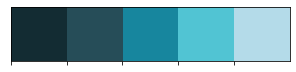

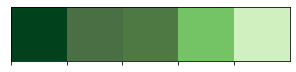

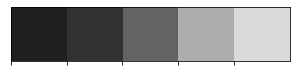

In [1]:
# data manupilation libary
import pandas as pd 
import numpy as np
# plotting and visualisations
import seaborn as sb
import matplotlib.pyplot as plt
# regrex libary
import re
# statistics libary
import statsmodels.api as sm
# types
from typing import List

df_laptop= pd.read_csv('./clean/laptops.csv')
df_fr= pd.read_csv('./clean/boulanger_store.csv')
df_eg= pd.read_csv('./clean/jumia_store.csv')
df_sa= pd.read_csv('./clean/amazon_sa_store.csv')
df_laptop.head(1)

# colors
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sb.palplot(colors_blue);
sb.palplot(colors_green);
sb.palplot(colors_dark);
sb.set_palette(sb.color_palette("Paired"))

# Intel vs AMD
show the diffrence between sales from intel and from AMD 
as we can see it seems that there are more intel laptops then there are AMD. 



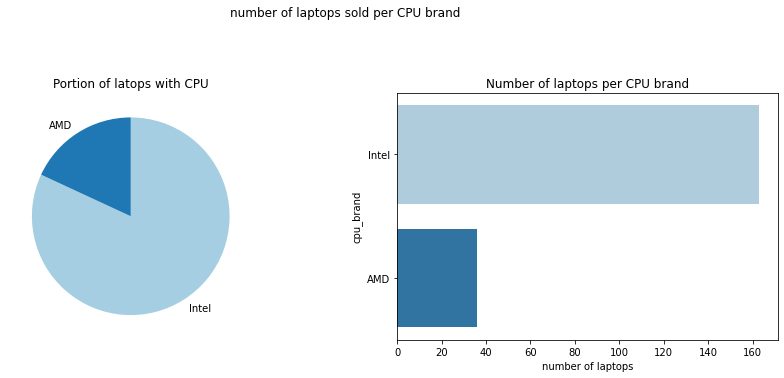

In [2]:
# show Market Share of Intel VS AMD laptops
sorted_counts= df_laptop.cpu_brand.value_counts()
plt.rcParams['figure.figsize'] = [15, 10]
plt.subplot(2, 2, 1) # 1 row , 2 cols, the 1st plot 
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title('Portion of latops with CPU')
# get percentage of CPU intel
plt.subplot(2, 2, 2) # 1 row , 2 cols, the 2st plot 
sb.countplot(data = df_laptop, y='cpu_brand', order=None, orient=None, color=None);
plt.yticks(ticks=[0,1], labels = ["Intel", "AMD"])
plt.title('Number of laptops per CPU brand')
plt.xlabel('number of laptops');
plt.suptitle("number of laptops sold per CPU brand", y = 1);

# Comapre the price of Laptops with Intel Based CPU vs AMD based CPU

Intel and AMD seem to have the same average price with AMD having a varity in price and Intel having more Outliers 

But taking another Look at the Data while splitting every CPU generation alone.

it seems that Intel Laptops with 9th gen CPU are much more expensive then there AMD counterpart 

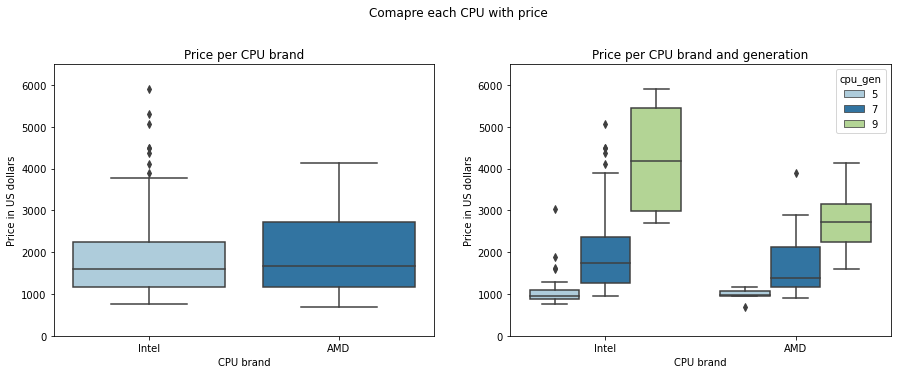

In [3]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.subplot(1, 2, 1)
sb.boxplot(data=df_laptop, x='cpu_brand', y='price');
plt.ylim((0, 6500))
plt.title('Price per CPU brand')
plt.xlabel('CPU brand')
plt.ylabel('Price in US dollars');
plt.subplot(1, 2, 2)
sb.boxplot(data=df_laptop, x='cpu_brand', hue= 'cpu_gen', y='price');
plt.ylim((0, 6500))
plt.title('Price per CPU brand and generation')
plt.xlabel('CPU brand')
plt.ylabel('Price in US dollars');
plt.suptitle("Comapre each CPU with price", y = 1.04);

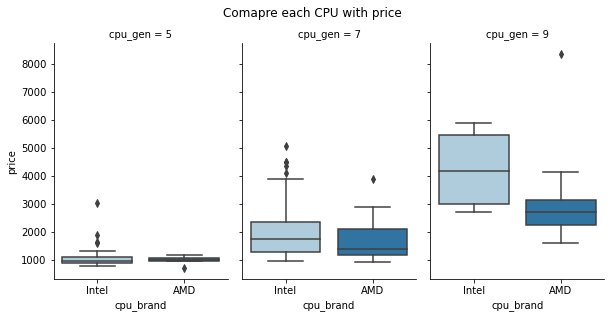

In [4]:
# comapre each generation side by side 
# plt.title('CPU price per generation comparison')
# plt.xlabel('CPu brand')
# plt.ylabel('Price in US dollars');
g = sb.catplot(x="cpu_brand", y="price",
                col="cpu_gen",
                data=df_laptop, kind="box",
                height=4, aspect=.7);
plt.suptitle("Comapre each CPU with price", y = 1.04);

# Feature Engineering 
## Motives 
predict the prices of the laptops using extra extracted features from the individul datasets

1. extract GPU types from the names of the rows
2. extract the ram number when availaible
3. extract storage types and storage capacity

### Boulager Dataset
Luckly this dataset is pretty clean and we only have to extract a few features from the columns

1. extract GPU info from the ports column
2. extract storage info like which type of storage and the capacity also do it for laptops with 2 storages


In [5]:
df_fr.ports.value_counts()
def extract_gpu_info(string):
    """extracts the GPU info Using Regrex expressions

    Args:
        string (str): strin containing gpu info
        example: ... RAM 16, GTX 1660TI, 15'in ...
    Returns:
        tuple(str, int): tuple with a string of GPU generation like RTX or GTX and model number
        example: (GTX, 1660)
    """    
    if type(string)!= str:
        return "None", 0
    extract_gpu_type= r'(:?RTX *\d+| GTX *\d+ *(Ti)*)'
    reg_exp= re.search(extract_gpu_type,string, re.IGNORECASE)
    gpu_type= reg_exp[0] if reg_exp else 'None'
    gpu_num= int(re.search(r'\d+', gpu_type, re.IGNORECASE)[0]) if re.search(r'\d+', gpu_type, re.IGNORECASE) else 0
    gpu_brand=  re.search(r'(:?RTX+|GTX)', gpu_type, re.IGNORECASE)[0] if re.search(r'(:?RTX+| GTX)', gpu_type, re.IGNORECASE) else 'None'
    return gpu_brand, gpu_num
df_fr['gpu_gen']= df_fr.ports.map(lambda x:extract_gpu_info(x)[0])
df_fr['gpu_num']= df_fr.ports.map(lambda x:extract_gpu_info(x)[1])
df_fr['gpu_info']= df_fr.ports.map(lambda x:extract_gpu_info(x))

In [6]:
# create 4 columns: storage_type_1 , storage_capacity_1, storage_type_2, storage_capacity_2
def extract_storage_info(string):
    """extracts the storage types and capacity and handeles the case where some laptops have 2 storages

    Args:
        string (str): String containg laptop specs. in French
        ...Ram 16, Disque Dur 1 TB, SSD 265...
    Returns:
        tuple(str, int, str, int): (storage type, storage capacity, extra storage type, extra storage capaicity)
    """    
    amount_pattern = r'(?:SSD \d+|Disque dur \d+)'
    amount_expr = re.compile(amount_pattern, re.IGNORECASE)
    occurences= amount_expr.findall(string) #extract all regrex patterns
    storage_reg= r'(?:SSD|Disque dur)' # patten to extract storage type
    capacity_reg= r'(\d+)' # pattern to extract capacity

    if(len(occurences)==2): # if we have 2 storages
        storage_type1= re.search(storage_reg, occurences[0], re.IGNORECASE)
        strage_type2= re.search(storage_reg, occurences[1], re.IGNORECASE)
        storage_cpacity1= re.search(capacity_reg, occurences[0], re.IGNORECASE)
        storage_cpacity2=  re.search(capacity_reg, occurences[1], re.IGNORECASE)
        return storage_type1[0], storage_cpacity1[0], strage_type2[0], storage_cpacity2[0]
    else:
        storage_type1= re.search(storage_reg, occurences[0], re.IGNORECASE)
        storage_cpacity1= re.search(capacity_reg, occurences[0], re.IGNORECASE)
        return storage_type1[0], storage_cpacity1[0], np.nan, np.nan
df_fr['storage_type_1']= df_fr.storage.map(lambda x:extract_storage_info(x)[0])
df_fr['storage_capacity_1']= df_fr.storage.map(lambda x:extract_storage_info(x)[1])
df_fr['storage_type_2']= df_fr.storage.map(lambda x:extract_storage_info(x)[2])
df_fr['storage_capacity_2']= df_fr.storage.map(lambda x:extract_storage_info(x)[3])
# turn all 1 terra into 1k GB for consistency
df_fr['storage_capacity_1']=df_fr['storage_capacity_1'].map(lambda x: 1000 if float(x)==1 else float(x))
df_fr['storage_capacity_2']=df_fr['storage_capacity_2'].map(lambda x: 1000 if float(x)==1 else float(x))
df_fr.head(1)

,Unnamed: 0,text,url,display,refresh_rate,cpu,storage,ram,price,earliest_arrival,...,ram_value,weight_KG,store,gpu_gen,gpu_num,gpu_info,storage_type_1,storage_capacity_1,storage_type_2,storage_capacity_2
0,0,PC Gamer \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tDell\n\...,https://www.boulanger.com/ref/1152079,"15,6"" Full HD (39,6 cm) - 120 Hz",120 Hz,"Intel Core i5 - 10300H : 2,5 GHz / Turboboost ...",SSD 512 Go,"Mémoire vive 8 Go - 2,3 kg",1062,chez vous dès vendredi 12 mars,...,8.0,2.3,Boulanger (FR),None,0,"(None, 0)",SSD,512.0,NaN,NaN


### Jumia Dataset (Egypt)
this Dataset is not very stuctured as all information is in the text column. so it will not be as easy as the last one
1. extract GPU info from the ports column
2. extract storage info like which type of storage and the capacity also do it for laptops with 2 storages

In [7]:
# create 4 columns: storage_type_1 , storage_capacity_1, storage_type_2, storage_capacity_2
def extract_storage_info(string):
    """extracts the storage types and capacity and handeles the case where some laptops have 2 storages. handles also missing spaces

    Args:
        string (str): String containg laptop specs. in English. handeles missing spaces
        ...Ram 16, HDD 1 TB, SSD 265...
    Returns:
        tuple(str, int, str, int): (storage type, storage capacity, extra storage type, extra storage capaicity)
    """    
    amount_pattern = r'(?:\d+|\d+ *GB|\d+ *TB) *(?:SSD|HDD)'
    amount_expr = re.compile(amount_pattern, re.IGNORECASE)
    occurences= amount_expr.findall(string)
    storage_reg= r'(?:SSD|HDD)'
    capacity_reg= r'(\d+)'
    if len(occurences) == 0: # if there are no storage info
        return np.nan, np.nan, np.nan, np.nan
    if(len(occurences)==2): # if we have 2 storages
        storage_type1= re.search(storage_reg, occurences[0], re.IGNORECASE)
        strage_type2= re.search(storage_reg, occurences[1], re.IGNORECASE)
        storage_cpacity1= re.search(capacity_reg, occurences[0], re.IGNORECASE)
        storage_cpacity2=  re.search(capacity_reg, occurences[1], re.IGNORECASE)
        if(not storage_type1 or not storage_cpacity1 or not strage_type2 or not storage_cpacity2) :
            print(string)
        return storage_type1[0], storage_cpacity1[0], strage_type2[0], storage_cpacity2[0]
    else:
        storage_type1= re.search(storage_reg, occurences[0], re.IGNORECASE)
        storage_cpacity1= re.search(capacity_reg, occurences[0], re.IGNORECASE)
        return storage_type1[0], storage_cpacity1[0], np.nan, np.nan
df_eg['storage_type_1']= df_eg.text.map(lambda x:extract_storage_info(x)[0])
df_eg['storage_capacity_1']= df_eg.text.map(lambda x:extract_storage_info(x)[1])
df_eg['storage_type_2']= df_eg.text.map(lambda x:extract_storage_info(x)[2])
df_eg['storage_capacity_2']= df_eg.text.map(lambda x:extract_storage_info(x)[3])
# turn all 1 terra into 1k GB for consistency
df_eg['storage_capacity_1']=df_eg['storage_capacity_1'].map(lambda x: 1000 if float(x)==1 else float(x))
df_eg['storage_capacity_2']=df_eg['storage_capacity_2'].map(lambda x: 1000 if float(x)==1 else float(x))
df_eg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          45 non-null     int64  
 1   url                 45 non-null     object 
 2   text                45 non-null     object 
 3   discount            45 non-null     object 
 4   original_price_EPG  45 non-null     object 
 5   brand               45 non-null     object 
 6   brand_url           45 non-null     object 
 7   price               45 non-null     int64  
 8   discount_value      45 non-null     int64  
 9   ram_value           45 non-null     int64  
 10  cpu_name            45 non-null     object 
 11  cpu_gen             45 non-null     int64  
 12  cpu_brand           45 non-null     object 
 13  store               45 non-null     object 
 14  storage_type_1      45 non-null     object 
 15  storage_capacity_1  45 non-null     float64
 16  storage_ty

In [8]:
def extract_gpu_info(string):
    """extract GPU info like generaion: RTX, GTX 
    also extract model number like 1060, 1660

    Args:
        string (str): string containg laptop specs

    Returns:
        tuple: (gpu generataion, gpu number)
    """    
    if type(string)!= str: # if it is a nan value
        return "None", 0
    extract_gpu_type= r'(?:GTX *(\d)+|RTX *(\d)+|(\d)+ *Ti)'
    reg_exp= re.search(extract_gpu_type,string, re.IGNORECASE)
    #print(reg_exp[0])
    gpu_type= reg_exp[0] if reg_exp else 'None'
    gpu_num= int(re.search(r'\d+', gpu_type, re.IGNORECASE)[0]) if re.search(r'\d+', gpu_type, re.IGNORECASE) else 0
    gpu_brand=  re.search(r'(:?RTX|GTX)', gpu_type, re.IGNORECASE)[0] if re.search(r'(:?RTX+|GTX)', gpu_type, re.IGNORECASE) else 'None'
    return gpu_brand, gpu_num
df_eg['gpu_gen']= df_eg.text.map(lambda x:extract_gpu_info(x)[0])
df_eg['gpu_num']= df_eg.text.map(lambda x:extract_gpu_info(x)[1])
df_eg['gpu_info']= df_eg.text.map(lambda x:extract_gpu_info(x))
df_eg.gpu_info.value_counts() # cheack the returned values as saanity check


(None, 0)       30
(GTX, 1660)      7
(GTX, 1650)      5
(None, 1660)     2
(RTX, 2060)      1
Name: gpu_info, dtype: int64

### Amazon Dataset (KSA)

In [9]:
# extract stoarge info which works on enlish and arabic
df_sa['storage_type_1']= df_sa.text.map(lambda x:extract_storage_info(x)[0])
df_sa['storage_capacity_1']= df_sa.text.map(lambda x:extract_storage_info(x)[1])
df_sa['storage_type_2']= df_sa.text.map(lambda x:extract_storage_info(x)[2])
df_sa['storage_capacity_2']= df_sa.text.map(lambda x:extract_storage_info(x)[3])
# turn all 1 terra into 1k GB for consistency
df_sa['storage_capacity_1']=df_sa['storage_capacity_1'].map(lambda x: 1000 if float(x)==1 else float(x))
df_sa['storage_capacity_2']=df_sa['storage_capacity_2'].map(lambda x: 1000 if float(x)==1 else float(x))

In [10]:
#extract gpu info
df_sa['gpu_gen']= df_sa.text.map(lambda x:extract_gpu_info(x)[0])
df_sa['gpu_num']= df_sa.text.map(lambda x:extract_gpu_info(x)[1])
df_sa['gpu_info']= df_sa.text.map(lambda x:extract_gpu_info(x))
df_sa.gpu_info.value_counts()

(None, 0)       20
(GTX, 1650)     13
(GTX, 1660)     11
(RTX, 2060)     11
(RTX, 2070)     10
(None, 1660)     3
(RTX, 2080)      2
(None, 1650)     2
(RTX, 3080)      1
(GTX, 1050)      1
Name: gpu_info, dtype: int64

In [11]:
# aggregate all the data into 1 database
cols_in_model= ['price', 'cpu_gen', 'cpu_brand',
 'discount_value', 'store', 'storage_type_1',
  'storage_type_2', 'storage_capacity_1', 'storage_capacity_2', 
  'gpu_gen', 'gpu_num', 'gpu_info', 'ram_value']
def create_merged_dataset(array_of_datasets: List[pd.DataFrame], cols_to_consider, col_to_predict)-> pd.DataFrame:
    cols_to_consider.append(col_to_predict)
    df_model= pd.DataFrame()
    for dataset in array_of_datasets:
        
        temp= dataset[cols_to_consider] 
        for column in temp.columns: # clean rows that have missing values
            temp= temp[~temp[column].isna()] # remove all rows that do not have any prediction variable
            if temp[column].dtype == pd.Categorical:
                temp= temp.join(pd.get_dummies(temp[column], prefix=column, drop_first=True))
                temp.drop(column, axis=1 ,inplace=True)
        
        df_model= pd.concat([df_model,temp]).drop_duplicates().reset_index(drop=True)
    # print(df_model)
    ## maybe fill na not sure
    df_model['intercept']= 1
    df_model.fillna(0, inplace=True)
    # print(df_model[col_to_predict])

    
    res = sm.OLS(df_model[col_to_predict], df_model.drop(col_to_predict, axis=1)).fit()
    return res, df_model
res, _= create_merged_dataset([df_sa, df_eg, df_fr], ['cpu_gen', 'cpu_brand'], 'price')
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.194     
Dependent Variable:   price             AIC:                 2811.0689 
Date:                 2021-08-10 18:35  BIC:                 2820.4586 
No. Observations:     169               Log-Likelihood:      -1402.5   
Df Model:             2                 F-statistic:         21.22     
Df Residuals:         166               Prob (F-statistic):  6.23e-09  
R-squared:            0.204             Scale:               9.6326e+05
-----------------------------------------------------------------------
                  Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
-----------------------------------------------------------------------
cpu_gen           444.7936  68.7400  6.4707 0.0000   309.0762  580.5111
cpu_brand_Intel    62.4320 190.9428  0.3270 0.7441  -314.5574  439.4213
intercept       -1160.4428 517.4105 -2.2428 0.0262 -2181.9963 -138.8894
-----------------------------------------------------------------------
Omnibus:               89.512         Durbin-Watson:            1.199  
Prob(Omnibus):         0.000          Jarque-Bera (JB):         392.127
Skew:                  2.047          Prob(JB):                 0.000  
Kurtosis:              9.239          Condition No.:            49     
=======================================================================

"""

# Preform Liner Regression Model to Predict Price

here I create a Liner Regression model using both nominal and Categorical features, after One Hot Encoding. 
the results show we were able to predict 86% of the price using these features and here are my findings:
1. the price is more influenced by the generation of the CPU then the brand that sells it
2. the price is influenced by wheather there is a GPU or not 
3. it is also influenced heavly by Storage even more than the amount of ram 

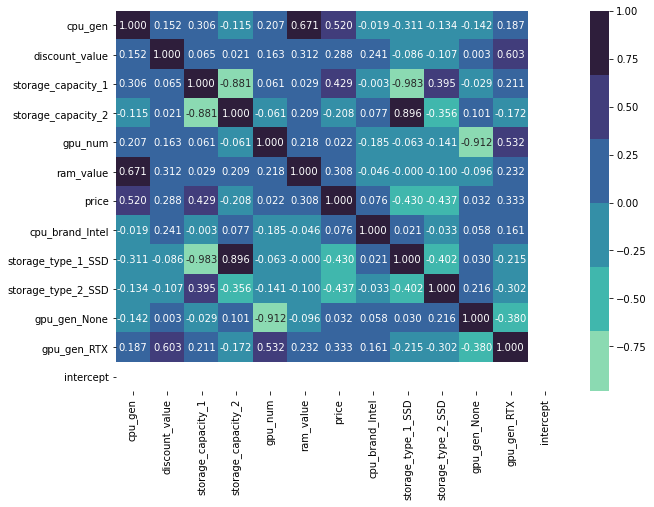

Text(0.5, 1.0, 'Correlation Matrix')

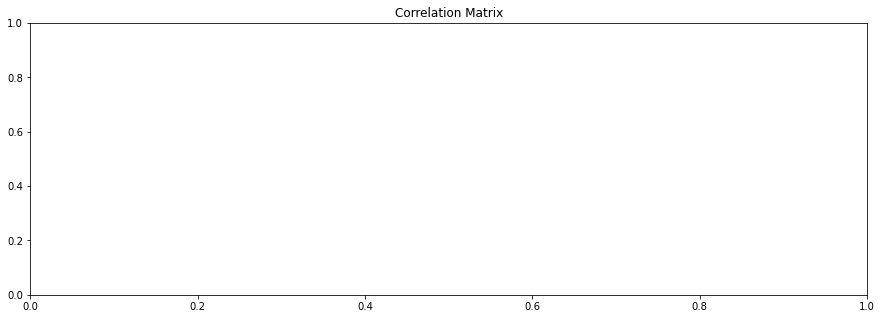

In [12]:
# create model with these columns
res, df_model= create_merged_dataset([df_sa, df_eg, df_fr], ['cpu_gen', 'cpu_brand',
 'discount_value', 'store', 'storage_type_1',
  'storage_type_2', 'storage_capacity_1', 'storage_capacity_2', 
  'gpu_gen', 'gpu_num', 'ram_value'], 'price')
# correlation plot of the model
plt.figure(figsize = [10, 7])
sb.heatmap(df_model.corr(), annot = True, fmt = '.3f',
        center = 0, cmap= sb.color_palette("mako_r") )
plt.show()
plt.title('Correlation Matrix')

Model Summary

In [13]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                 Adj. R-squared:        0.763   
Dependent Variable:    price               AIC:                   502.8025
Date:                  2021-08-10 18:35    BIC:                   521.8047
No. Observations:      36                  Log-Likelihood:        -239.40 
Df Model:              11                  F-statistic:           11.22   
Df Residuals:          24                  Prob (F-statistic):    5.68e-07
R-squared:             0.837               Scale:                 52452.  
--------------------------------------------------------------------------
                     Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
--------------------------------------------------------------------------
cpu_gen               26.7694  67.7007  0.3954 0.6960  -112.9581  166.4968
discount_value         5.3377   5.6752  0.9405 0.3563    -6.3752   17.0507
storage_capacity_1     0.3237   0.7903  0.4096 0.6857    -1.3074    1.9548
storage_capacity_2     0.9922   0.3732  2.6588 0.0137     0.2220    1.7623
gpu_num                0.1426   0.1870  0.7626 0.4531    -0.2433    0.5285
ram_value              4.9164  18.8084  0.2614 0.7960   -33.9022   43.7351
cpu_brand_Intel       80.3849 155.2213  0.5179 0.6093  -239.9762  400.7460
storage_type_1_SSD -1291.7134 590.9603 -2.1858 0.0388 -2511.3955  -72.0312
storage_type_2_SSD  -794.5141 121.5117 -6.5386 0.0000 -1045.3019 -543.7262
gpu_gen_None         332.9597 288.8319  1.1528 0.2604  -263.1600  929.0794
gpu_gen_RTX         -262.0193 220.6039 -1.1877 0.2466  -717.3234  193.2848
intercept            575.8472 874.5659  0.6584 0.5165 -1229.1682 2380.8626
--------------------------------------------------------------------------
Omnibus:                 7.184           Durbin-Watson:              1.866
Prob(Omnibus):           0.028           Jarque-Bera (JB):           6.090
Skew:                    0.985           Prob(JB):                   0.048
Kurtosis:                3.419           Condition No.:              40366
==========================================================================
* The condition number is large (4e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [14]:
# print P values shwoing the influence of the features relative to the price
res, df_model= create_merged_dataset([df_sa, df_eg, df_fr], ['cpu_gen', 'cpu_brand',
 'discount_value', 'store', 'storage_type_1',
  'storage_type_2', 'storage_capacity_1', 'storage_capacity_2', 
  'gpu_gen', 'gpu_num', 'ram_value'], 'price')
# correlation plot
df_pval= pd.DataFrame({'categories': res.pvalues})
# df_val= df_val.pivot(columns='bar', values=['baz', 'zoo'])
# df_pval.columns=['price']
cat=[]
p=[]
for i in res.pvalues.index:
        cat.append(i)
        p.append(res.pvalues[i])
pd.DataFrame({'cat': cat, 'p': p});

# hypothesis testing 
we will assume an $\alpha$ of 0.5

## Hypothesis 1

it is comman to think that in contries with less curency value Big companies sell on average cheaper products. we will test this hypothesis using Bootstaping and P-values.

### Null Hypothesis

$H0: \mu$ <sub>Egypt</sub> >= $\mu$ <sub>Saudi</sub> or $\mu$ <sub>Saudi</sub> - $\mu$ <sub>Egypt</sub> > 0

### Alternative Hypothesis
$H1: \mu$ <sub>Egypt</sub> < $\mu$ <sub>Saudi</sub> or $\mu$ <sub>Saudi</sub> - $\mu$ <sub>Egypt</sub> <= 0



In [15]:
# get the mean of the saudi arabian daataset
mean_saudi= df_laptop[df_laptop.store=='Amazon (SA)'].price.mean()
# get the mean of the egyptian dataset
mean_egypt= df_laptop[df_laptop.store=='Jumia (EG)'].price.mean()
observed_mean= mean_saudi- mean_egypt
# bootstraping
sample_size=200
samples= 10_000
dist_diff= []
for _ in range(samples):
    df_sample_egypt= df_laptop[df_laptop.store=='Jumia (EG)'].sample(sample_size, replace=True)
    df_sample_saudi= df_laptop[df_laptop.store=='Amazon (SA)'].sample(sample_size, replace=True)
    mean_egy= df_sample_egypt.price.mean()
    mean_saudi= df_sample_saudi.price.mean()
    dist_diff.append(mean_saudi-mean_egy)
dist_diff= np.array(dist_diff)

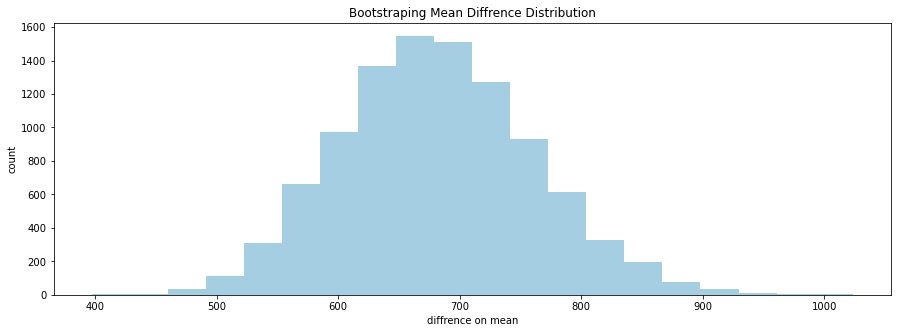

In [16]:
plt.hist(dist_diff, bins=20);
plt.title('Bootstraping Mean Diffrence Distribution');
plt.xlabel('diffrence on mean');
plt.ylabel('count');

P-value= 0.0 of 1 sided Hypothesis test to the right of the observed mean


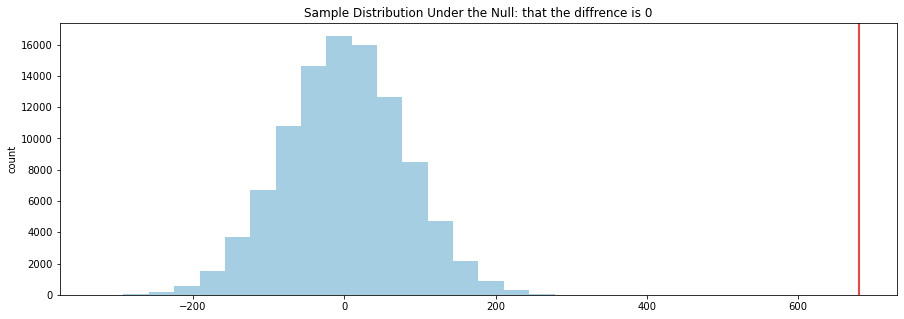

In [17]:
# simulate the null
null_dist= np.random.normal(0, dist_diff.std(), size=10_0000)
print(f'P-value= {(null_dist > observed_mean).mean()} of 1 sided Hypothesis test to the right of the observed mean')
plt.hist(null_dist, bins=20)
plt.axvline(observed_mean, color='red');
plt.ylabel('count');
plt.title('Sample Distribution Under the Null: that the diffrence is 0');

## Hypothesis 2

it is comman to think that in contries with less curency value Big companies sell on average cheaper products. we will test this hypothesis using Bootstaping and P-values.

### Null Hypothesis

$H0: \mu$ <sub>Saudi</sub> >= $\mu$ <sub>France</sub> or $\mu$ <sub>France</sub> - $\mu$ <sub>Saudi</sub> > 0

### Alternative Hypothesis
$H1: \mu$ <sub>Saudi</sub> < $\mu$ <sub>France</sub> or $\mu$ <sub>France</sub> - $\mu$ <sub>Saudi</sub> <= 0



In [18]:
mean_saudi= df_laptop[df_laptop.store=='Amazon (SA)'].price.mean()
mean_france= df_laptop[df_laptop.store=='Boulanger (FR)'].price.mean()
observed_mean= mean_france- mean_saudi
print(f'saudi mean= {mean_saudi}, france mean= {mean_france}, observed_mean= {observed_mean}')
# bootstraping
sample_size=50
samples= 10_00
dist_diff= []
for _ in range(samples):
    df_sample_france= df_laptop[df_laptop.store=='Boulanger (FR)'].sample(sample_size, replace=True)
    df_sample_saudi= df_laptop[df_laptop.store=='Amazon (SA)'].sample(sample_size, replace=True)
    mean_france= df_sample_france.price.mean()
    mean_saudi= df_sample_saudi.price.mean()
    dist_diff.append(mean_france- mean_saudi)
dist_diff= np.array(dist_diff);
(dist_diff > 0).sum();

saudi mean= 1825.4444444444443, france mean= 2384.0365853658536, observed_mean= 558.5921409214093


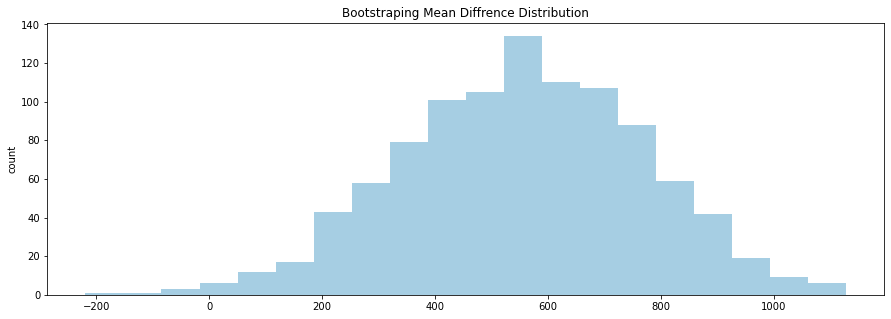

In [19]:
plt.hist(dist_diff, bins=20);
plt.title('Bootstraping Mean Diffrence Distribution');
plt.ylabel('count');

P-value= 0.00439 of 1 sided Hypothesis test to the right of the observed mean


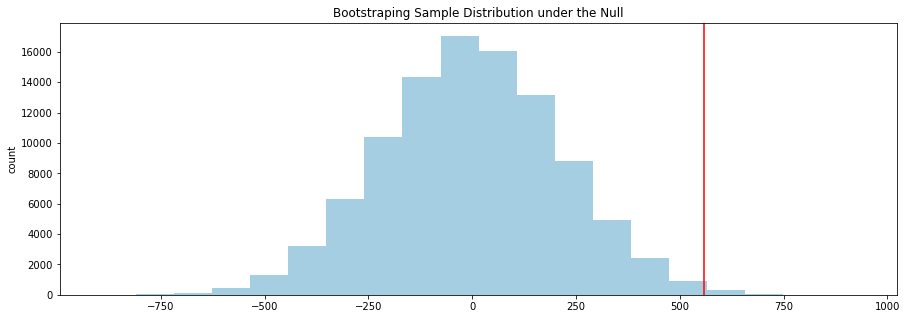

In [20]:
# simulate the null
null_dist= np.random.normal(0, dist_diff.std(), size=10_0000)
print(f'P-value= {(null_dist > observed_mean).mean()} of 1 sided Hypothesis test to the right of the observed mean')
plt.hist(null_dist, bins=20)
plt.axvline(observed_mean, color='red');
plt.title('Bootstraping Sample Distribution under the Null');
plt.ylabel('count');

## Conclustion
It is Clear we were able to reject the null as we got a 0.0 on the first test and 0.00357 on the second with a threshold of 0.05.


which means that the average price of Laptops in france exeeds that of Egypt and Saudi Arabia.

# Price vs Discount
Here I am looking at wheather there are any trends between the price of a laptop and discounted value on it. also looking at this relative to each store

There does not seem to be a relation between Price and discount

There is a relation between the store and the price and discount as Boulanger (FR) has higher prices but also higher discounts comapre to Jumia (EG)

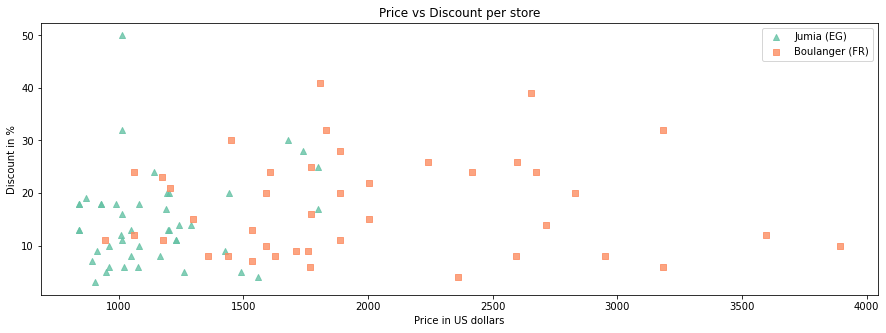

In [21]:
df_vis= df_laptop.copy()
df_vis= df_vis[~(df_vis.discount_value ==0)] # remove laptops that had no discounts
# scatter plot of the price vs Discount 
markers= [['Jumia (EG)', '^'], ['Boulanger (FR)', 's']]
for i, (category, marker) in enumerate(markers):
    temp= df_vis[df_vis['store']== category]
    sb.regplot(data = temp, x = 'price', y = 'discount_value', marker = marker, fit_reg=False, x_jitter=0.04, color=sb.color_palette("Set2")[i]); 

plt.legend(labels=['Jumia (EG)', 'Boulanger (FR)']);
plt.title('Price vs Discount per store')
plt.xlabel('Price in US dollars')
plt.ylabel('Discount in %');

# GPU generation VS CPU
As you know Gaming requires both GPU and CPU.
the Nivida GPU are categorized into 2 categorize RTX, GTX with the former being the stronger more expensive one

here we see the frequency where each cpu Generation is paired with a gpu generation

1. from the 1st set of plots it is clear that the I7 is the most famous of the CPU geneartions and the RTX is the most famous of the GPU generations

2. the 2nd set of plots shows the relative paring between CPU's of each brand and the GPU generation. form this plot it seems that Intel is more widley acceoted over all and it is used a lot in laptops without a gaming GPU while AMD seems to be more gaming focues

C:\Users\Karim\anaconda3\envs\project-env\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


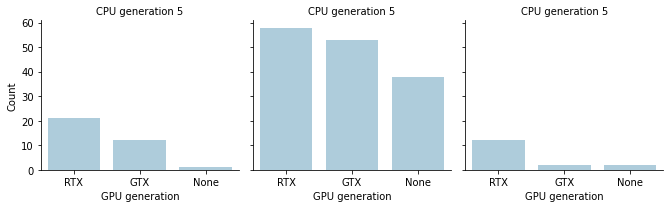

In [22]:
# create facegrid based on category
# create a full dataset of all the 3 sub datasets after feature extraction
df_full= pd.concat([df_fr,df_eg, df_sa]).drop_duplicates().reset_index(drop=True)
# remove rows with no GPU or CPU info
df_vis= df_full[~df_full.gpu_gen.isna()]
df_vis= df_full[~df_full.cpu_gen.isna()]
# make CPU generation an integer
df_vis['cpu_gen']= df_full.cpu_gen.map(lambda x: int(x))
# remove older CPU like Gen 1 and gen 3 as AMD was not established company back then
df_vis= df_vis[df_vis.cpu_gen > 3]
# sb.barplot(data=df_vis, x='VClass', y='comb', color=base_color, errwidth=0)
df_vis.groupby(['cpu_gen', 'gpu_gen']).count()
# vis
g = sb.FacetGrid(data = df_vis, col = 'cpu_gen', col_wrap = 7)
g.map(sb.countplot, "gpu_gen");
g.set_axis_labels("GPU generation", "Count")
g.set_titles('CPU generation 5','CPU generation 7', 'CPU generation 9');
# plt.suptitle("Relation between CPU generation and the paired up GPU generation", y = 1.04);

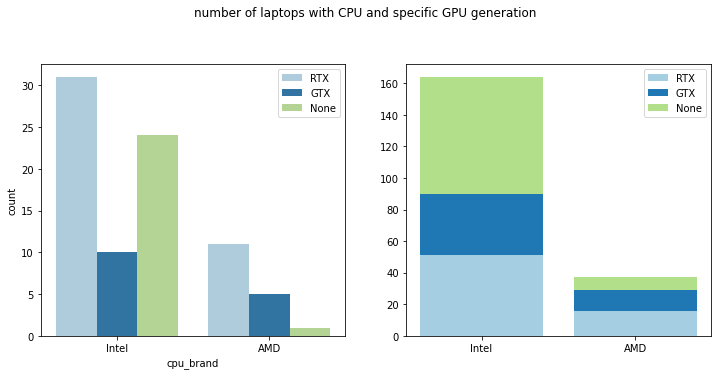

In [23]:
# create stacked bar charts + relative bar chart of CPu brand and GPU paired with it
cat1_order = ['Intel', 'AMD']
cat2_order = ['RTX', 'GTX', 'None']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart of absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df_fr, x = 'cpu_brand', hue = 'gpu_gen',
             order = cat1_order, hue_order = cat2_order)
plt.legend()


# right plot: stacked bar chart to show relative numbers
plt.subplot(1, 2, 2)
df= df_full
baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['gpu_gen'] == cat2]['cpu_brand'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order);
plt.suptitle("number of laptops with CPU and specific GPU generation", y = 1.04);

## the average price for each combination of CPU and GPU generations

it is clear that the RTX with 9th gen is the most impressive
but what I think is worth noting is that 9th Gen Cpu without a GPU actually come in second place. which shows that most of the price diffrence is due to the CPU

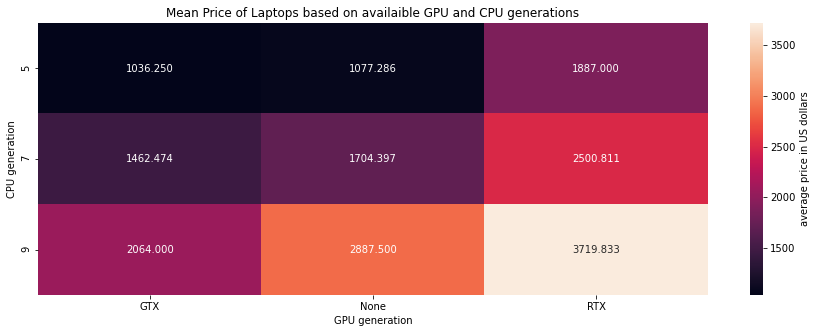

In [24]:
# create Heatmap of average price of each category
df= df_vis
cat_means = df.groupby(['cpu_gen', 'gpu_gen']).mean()['price']
cat_means = cat_means.reset_index(name = 'price_avg')
cat_means = cat_means.pivot(index = 'cpu_gen', columns = 'gpu_gen',
                            values = 'price_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'average price in US dollars'});
plt.title('Mean Price of Laptops based on availaible GPU and CPU generations');
plt.xlabel('GPU generation')
plt.ylabel('CPU generation');

this plot shows a huge **limitation** with the above analysis as the data is pretty concentrated in some categories and very sparse in others. 

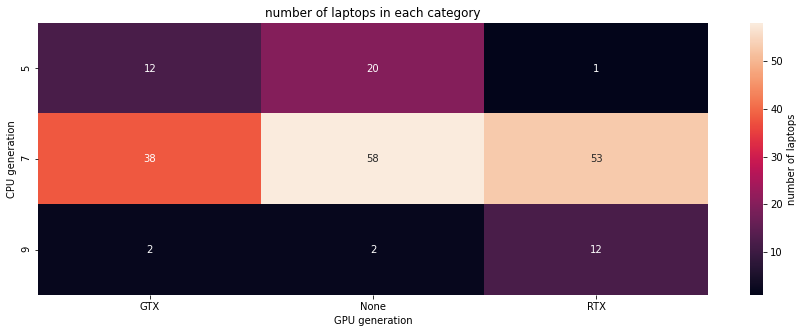

In [25]:
df= df_vis
cat_means = df.groupby(['cpu_gen', 'gpu_gen']).nunique()['text']
cat_means = cat_means.reset_index(name = 'price_avg')
cat_means = cat_means.pivot(index = 'cpu_gen', columns = 'gpu_gen',
                            values = 'price_avg')
sb.heatmap(cat_means, annot = True,
           cbar_kws = {'label' : 'number of laptops'});
plt.title('number of laptops in each category')
plt.xlabel('GPU generation')
plt.ylabel('CPU generation');

In [26]:
# exports 
# !jupyter nbconvert explanatory.ipynb --to slides --post serve  --no-input --no-prompt
!jupyter nbconvert explanatory.ipynb --to markdown --post serve  --no-input --no-prompt
print('Done')